In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
We wrote a for loop to entail all the values in the config file. At the end of it, we took the highest accuracy for the dataset and added another layer to get even higher accuracy.
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import os
import csv




/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


['32', '10', '82', 'True', '20', 'keras_cifar10_trained_model2.h5', '1600', 'False', 'False', 'False', 'False', 'False', '0', '0.1', '0.1', 'True', 'False']
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.


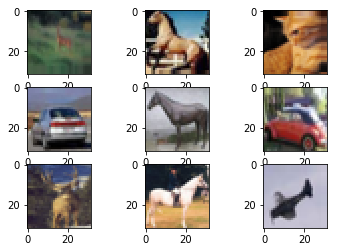

Epoch 1/82
1600/1600 [==============================] - 26s 17ms/step - loss: 1.8623 - acc: 0.3160 - val_loss: 1.5676 - val_acc: 0.4370
Epoch 2/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.5704 - acc: 0.4250 - val_loss: 1.3599 - val_acc: 0.5122
Epoch 3/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.4429 - acc: 0.4785 - val_loss: 1.2487 - val_acc: 0.5585
Epoch 4/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.3544 - acc: 0.5141 - val_loss: 1.2082 - val_acc: 0.5739
Epoch 5/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.2708 - acc: 0.5461 - val_loss: 1.1033 - val_acc: 0.6099
Epoch 6/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.2098 - acc: 0.5727 - val_loss: 1.0464 - val_acc: 0.6341
Epoch 7/82
1600/1600 [==============================] - 22s 14ms/step - loss: 1.1527 - acc: 0.5939 - val_loss: 0.9863 - val_acc: 0.6547
Epoch 8/82
1600/1600 [==========================

Epoch 61/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7448 - acc: 0.7514 - val_loss: 0.6409 - val_acc: 0.7903
Epoch 62/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7401 - acc: 0.7508 - val_loss: 0.6448 - val_acc: 0.7816
Epoch 63/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7457 - acc: 0.7507 - val_loss: 0.6419 - val_acc: 0.7822
Epoch 64/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7415 - acc: 0.7522 - val_loss: 0.6333 - val_acc: 0.7942
Epoch 65/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7434 - acc: 0.7509 - val_loss: 0.6185 - val_acc: 0.7945
Epoch 66/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7354 - acc: 0.7527 - val_loss: 0.6600 - val_acc: 0.7921
Epoch 67/82
1600/1600 [==============================] - 22s 14ms/step - loss: 0.7476 - acc: 0.7494 - val_loss: 0.6780 - val_acc: 0.7783
Epoch 68/82
1600/1600 [==================

In [ ]:
save_dir = os.path.join(os.getcwd(), 'saved_models')

def str_to_bool(s):
    if s == 'True':
         return True
    elif s == 'False':
         return False
    else:
         raise ValueError
            
import matplotlib
import matplotlib.pyplot as plt


with open('config.csv', 'rt') as csvfile:
	configreader = csv.reader(csvfile, delimiter=',', quotechar='|')
	next(configreader)
	next(configreader)
	for row in configreader:
		print(row)
		[batch_size,num_classes,epochs,data_augmentation,num_predictions,model_name,steps_per_epoch,featurewise_center,samplewise_center,featurewise_std_normalization,samplewise_std_normalization,zca_whitening,rotation_range,width_shift_range,height_shift_range,horizontal_flip,vertical_flip] = row
		batch_size = int(batch_size) 
		num_classes = int(num_classes) 
		epochs = int(epochs) 
		data_augmentation = str_to_bool(data_augmentation) 
		num_predictions = int(num_predictions) 
		steps_per_epoch = int(steps_per_epoch)
		featurewise_center = str_to_bool(featurewise_center)
		samplewise_center = str_to_bool(samplewise_center)
		featurewise_std_normalization = str_to_bool(featurewise_std_normalization)
		samplewise_std_normalization = str_to_bool(samplewise_std_normalization)
		zca_whitening = str_to_bool(zca_whitening)
		rotation_range = int(rotation_range)
		width_shift_range = float(width_shift_range)
		height_shift_range = float(height_shift_range)
		horizontal_flip = str_to_bool(horizontal_flip)
		vertical_flip = str_to_bool(vertical_flip)
		# The data, shuffled and split between train and test sets:
		(x_train, y_train), (x_test, y_test) = cifar10.load_data()
		print('x_train shape:', x_train.shape)
		print(x_train.shape[0], 'train samples')
		print(x_test.shape[0], 'test samples')
		# Convert class vectors to binary class matrices.
		y_train = keras.utils.to_categorical(y_train, num_classes)
		y_test = keras.utils.to_categorical(y_test, num_classes)
		model = Sequential()
		model.add(Conv2D(32, (3, 3), padding='same',
						 input_shape=x_train.shape[1:]))
		model.add(Activation('relu'))
		model.add(Conv2D(32, (3, 3)))
		model.add(Activation('relu'))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Conv2D(64, (3, 3), padding='same'))
		model.add(Activation('relu'))
		model.add(Conv2D(64, (3, 3)))
		model.add(Activation('relu'))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation('relu'))
		model.add(Dropout(0.5))
		model.add(Dense(num_classes))
		model.add(Activation('softmax'))
		# initiate RMSprop optimizer
		opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
		# Let's train the model using RMSprop
		model.compile(loss='categorical_crossentropy',
					  optimizer=opt,
					  metrics=['accuracy'])
		x_train = x_train.astype('float32')
		x_test = x_test.astype('float32')
		x_train /= 255
		x_test /= 255
		if not data_augmentation:
			print('Not using data augmentation.')
			model.fit(x_train, y_train,
					  batch_size=batch_size,
					  steps_per_epoch = steps_per_epoch,
					  epochs=epochs,
					  validation_data=(x_test, y_test),
					  shuffle=True)
		else:
			print('Using real-time data augmentation.')
			# This will do preprocessing and realtime data augmentation:
			datagen = ImageDataGenerator(
				featurewise_center=featurewise_center,  # set input mean to 0 over the dataset
				samplewise_center=samplewise_center,  # set each sample mean to 0
				featurewise_std_normalization=featurewise_std_normalization,  # divide inputs by std of the dataset
				samplewise_std_normalization=samplewise_std_normalization,  # divide each input by its std
				zca_whitening=zca_whitening,  # apply ZCA whitening
				rotation_range=rotation_range,  # randomly rotate images in the range (degrees, 0 to 180)
				width_shift_range=width_shift_range,  # randomly shift images horizontally (fraction of total width)
				height_shift_range=height_shift_range,  # randomly shift images vertically (fraction of total height)
				horizontal_flip=horizontal_flip,  # randomly flip images
				vertical_flip=vertical_flip)  # randomly flip images
			# Configure batch size and retrieve one batch of images
			img_rows = 32
			img_cols = 32
			for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
			# Show 9 images
				for i in range(0, 9):
					plt.subplot(330 + 1 + i)
					plt.imshow(X_batch[i].reshape(img_rows, img_cols, 3))
				# show the plot
				plt.show()
				break
			# Compute quantities required for feature-wise normalization
			# (std, mean, and principal components if ZCA whitening is applied).
			datagen.fit(x_train)
			# Fit the model on the batches generated by datagen.flow().
			history = model.fit_generator(datagen.flow(x_train, y_train,
											 batch_size=batch_size),
								steps_per_epoch = steps_per_epoch,
								epochs=epochs,
								validation_data=(x_test, y_test),
								workers=1)
			
		# list all data in history
		print(history.history.keys())
		# summarize history for accuracy
		plt.plot(history.history['acc'])
		plt.plot(history.history['val_acc'])
		plt.title('model accuracy')
		plt.ylabel('accuracy')
		plt.xlabel('epoch')
		plt.legend(['train', 'test'], loc='upper left')
		plt.show()
		# summarize history for loss
		plt.plot(history.history['loss'])
		plt.plot(history.history['val_loss'])
		plt.title('model loss')
		plt.ylabel('loss')
		plt.xlabel('epoch')
		plt.legend(['train', 'test'], loc='upper left')
		plt.show()
		# Save model and weights
		if not os.path.isdir(save_dir):
			os.makedirs(save_dir)
		model_path = os.path.join(save_dir, model_name)
		model.save(model_path)
		print('Saved trained model at %s ' % model_path)
		# Score trained model for test accuracy.
		scores = model.evaluate(x_test, y_test, verbose=1)
		print('Test loss:', scores[0])
		print('Test accuracy:', scores[1])  
		# Score trained model for test accuracy.
		scores1 = model.evaluate(x_train, y_train, verbose=1)
		print('Train loss:', scores1[0])
		print('Train accuracy:', scores1[1])

In [ ]:
batch_size = 32
num_classes = 10
epochs = 72
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32*3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32*3, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


# initiate RMSprop optimizer
opt1 = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              steps_per_epoch = 1600,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                                     steps_per_epoch = 1600,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores_new = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])